In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import matplotlib.pyplot as plt

# Splitting the Data

In [2]:
#Loading the dataset
housing = fetch_california_housing()

In [3]:
#Creating training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target)

In [4]:
#Creating training and validation datasets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train)

In [5]:
#Normalizing the training, validation and testing features using Standard Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

# Creating a MLP Regressor using Sequential API

In [6]:
#Creating MLP model for Regression using Sequential API
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [7]:
#Viewing the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


# Compiling the Model

In [8]:
#Compiling the model 
model.compile(
    loss = "mse", #Since mse is the best metric for regression tasks
    optimizer = "sgd", #Using SGD backpropogation for optimization
    metrics = ["mean_squared_error"]
)

# Creating Callbacks for Model Restoration

In [9]:
#Creating callbacks so that the most accurate model can be saved for all epochs
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_modek.h5", save_best_only=True)

In [10]:
#Creating early stopping callback so that model is saved if doesn't give any more progress 
earlystop_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Fitting the Model with Callbacks

In [12]:
#Fitting the model with callbacks so as to save progress along the way
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, earlystop_cb])

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4893 - mean_squared_error: 0.4893 - val_loss: 0.5282 - val_mean_squared_error: 0.5282
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4437 - mean_squared_error: 0.4437 - val_loss: 0.5018 - val_mean_squared_error: 0.5018
Epoch 3/100
363/363 [==============================] - 0s 990us/step - loss: 0.4176 - mean_squared_error: 0.4176 - val_loss: 0.4923 - val_mean_squared_error: 0.4923
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4071 - mean_squared_error: 0.4071 - val_loss: 0.4824 - val_mean_squared_error: 0.4824
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3973 - mean_squared_error: 0.3973 - val_loss: 0.4765 - val_mean_squared_error: 0.4765
Epoch 6/100
363/363 [==============================] - 0s 949us/step - loss: 0.3889 - mean_squared_error: 0.3889 - val_loss: 0.4727 - val_mean_squared_error: 0.4727
Epoch 7/100
363/36

In [13]:
#Viewing parameters of the model obtained
history.params

{'epochs': 100, 'steps': 363, 'verbose': 1}

# Plotting Learning Curve for the Model

In [14]:
#Using pandas to convert obtained loss and extra parameters into dataframe
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,mean_squared_error,val_loss,val_mean_squared_error
0,0.489298,0.489298,0.528249,0.528249
1,0.443671,0.443671,0.501804,0.501804
2,0.417602,0.417602,0.492259,0.492259
3,0.407098,0.407098,0.482378,0.482378
4,0.397300,0.397300,0.476532,0.476532


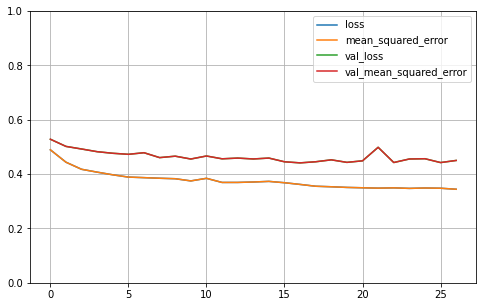

In [15]:
#Plotting a graph for learning curve using obtained dataframe
history_df.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Evaluating the Model

In [16]:
#Evaluating the modelfor the test set
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 689us/step - loss: 0.4001 - mean_squared_error: 0.4001


[0.40007907152175903, 0.40007907152175903]

# Predicting Labels using Model

In [17]:
#Creating instances from the test set
X_new = X_test[:3]
X_new

array([[-1.16305641,  0.17928262, -0.06837672,  0.13224167, -0.79766393,
         0.07911194,  1.03762066, -0.84348529],
       [-0.35028013, -0.46231135,  0.00436561, -0.10220801,  0.64223732,
        -0.07298225,  1.72703925, -2.13490296],
       [ 1.66076994, -1.02370607,  1.28722656, -0.15881233, -0.13790667,
         0.01309169,  0.95843069, -1.17010843]])

In [18]:
#Computing the class probabilities for the new set
y_proba = model.predict(X_new)

In [19]:
#Viewing the class probabilities
y_proba.round(2)

array([[0.9 ],
       [1.77],
       [3.45]], dtype=float32)

In [20]:
#Viewing whether the regressor correctly identified the labels
y_new = y_test[:3]
y_new

array([0.659, 1.405, 3.435])